#  Read Noise Calculator notebook

This notebook calculates the average read noise by taking a master bias, removing it from a bias and averaging a central portion of the resulting image.

Made by: Harlan Shaw <harlan.shaw@ucalgary.ca>

## Required Python packages:
[Astropy](https://www.astropy.org/)

[CCDProc](https://ccdproc.readthedocs.io/en/latest/index.html)


It's recommended you download and install [Anaconda](https://www.anaconda.com/products/individual#Downloads) as this contains a Python environment and Astropy.

You will need to install CCDProc using the Conda install command: `conda install -c conda-forge ccdproc`

This will also install Astropy if not already installed.

## Citations:
This project uses:

[Astropy](https://www.astropy.org/acknowledging.html)

[CCDProc](https://ccdproc.readthedocs.io/en/latest/citation.html)

## Required Variables

The following variables must be set for this notebook to function

In [17]:
PATH_TO_MASTER_BIAS = "Reduced/combined_bias_mean.fit"
PATH_TO_BIAS = "I:/Work/BN Data/calib backup/2021SpookyDay5CBias-045.fit"
CUTOUT_PERCENT_FROM_CENTRE = 0.25
GAIN = 1.42

## Calculation and display

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
The read noise is 8.17 ADU
The read noise is 5.75 electrons


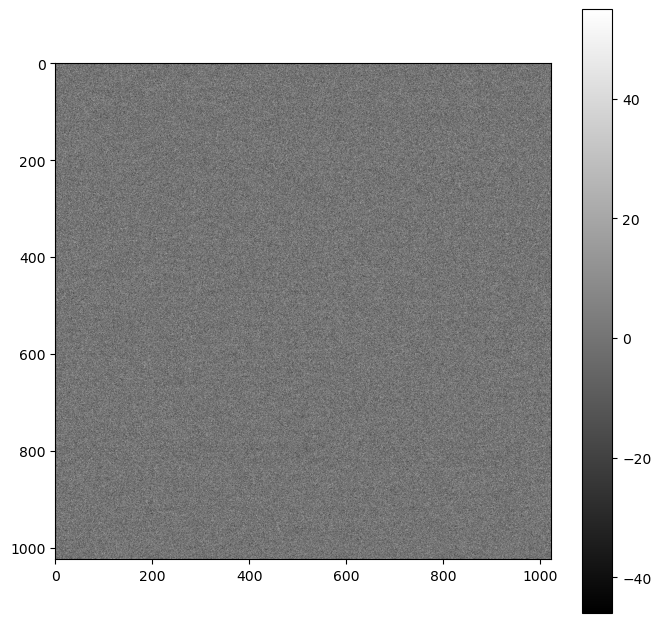

In [19]:
from pathlib import Path
from astropy.nddata import CCDData, Cutout2D
from astropy.units import adu
from ccdproc import subtract_bias
import matplotlib.pyplot as plt
import numpy as np

# Read in a known master bias and a normal bias
master = CCDData.read(Path(PATH_TO_MASTER_BIAS), unit=adu)
normal_bias = CCDData.read(Path(PATH_TO_BIAS), unit=adu)

# Remove master from normal
read_noise_image = subtract_bias(normal_bias, master)


# Gather percentage of image defined above from  read noise image
cutout_x = int(master.shape[0] * CUTOUT_PERCENT_FROM_CENTRE)
cutout_y = int(master.shape[1] * CUTOUT_PERCENT_FROM_CENTRE)
cutout_size = (cutout_x, cutout_y)

x_middle = int(master.shape[0] * 0.5)
y_middle = int(master.shape[1] * 0.5)
middle_position = (x_middle, y_middle)

cutout = Cutout2D(read_noise_image, middle_position, cutout_size)

# Absolute as a perfect world would have 0 read noise
# And noise is plus or minus from 0.
average_read_noise_ADU = np.average(np.absolute(cutout.data))
average_read_noise_electrons = average_read_noise_ADU * GAIN

print(f"The read noise is {average_read_noise_ADU:.2f} ADU")
print(f"The read noise is {average_read_noise_electrons:.2f} electrons")

plt.figure(figsize=(8,8), dpi=100)
plt.imshow(cutout.data, cmap='gray')
plt.colorbar()